In [6]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score,confusion_matrix
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('E:\syntax code\python\jupytr\dataset\diabetes_prediction_dataset.csv')
df1=pd.read_csv('E:\syntax code\python\jupytr\dataset\diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [8]:
df = df.dropna(subset=['gender'])

In [9]:
gender_mapping = {'Female': 0, 'Male': 1}

# Menggunakan method map() untuk mengganti nilai teks dengan nilai numerik
df['gender'] = df['gender'].map(gender_mapping)

# Menggantikan nilai NaN dengan nilai default (misalnya, -1) atau nilai lain yang sesuai
df['gender'] = df['gender'].fillna(1)

# Mengubah tipe data kolom 'gender' menjadi integer
df['gender'] = df['gender'].astype(int)

In [10]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [11]:
df['bmi'] = df['bmi'].astype(int)
df['HbA1c_level'] = df['HbA1c_level'].astype(int)
df['age'] = df['age'].astype(int)

In [12]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [13]:
df=df.replace({'smoking_history':{'current':1,'never':0,'No Info':2,'former':3,'not current':4,'ever':5}})
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25,6,140,0
1,0,54,0,0,2,27,6,80,0
2,1,28,0,0,0,27,5,158,0
3,0,36,0,0,1,23,5,155,0
4,1,76,1,1,1,20,4,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,2,27,6,90,0
99996,0,2,0,0,2,17,6,100,0
99997,1,66,0,0,3,27,5,155,0
99998,0,24,0,0,0,35,4,100,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   gender               100000 non-null  int32
 1   age                  100000 non-null  int32
 2   hypertension         100000 non-null  int64
 3   heart_disease        100000 non-null  int64
 4   smoking_history      100000 non-null  int64
 5   bmi                  100000 non-null  int32
 6   HbA1c_level          100000 non-null  int32
 7   blood_glucose_level  100000 non-null  int64
 8   diabetes             100000 non-null  int64
dtypes: int32(4), int64(5)
memory usage: 5.3 MB


In [16]:
'''# Impor pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Membaca dataset
# Gantilah "nama_file_dataset.csv" dengan nama file dataset Anda

# Memisahkan fitur (X) dan target (y)
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membangun model neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Kompilasi model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Pelatihan model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluasi model pada data pengujian
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy*100:.2f}%")

# Menggunakan model untuk prediksi
predictions = model.predict(X_test)
'''

'# Impor pustaka yang diperlukan\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nfrom keras.models import Sequential\nfrom keras.layers import Dense\n\n# Membaca dataset\n# Gantilah "nama_file_dataset.csv" dengan nama file dataset Anda\n\n# Memisahkan fitur (X) dan target (y)\nX = df.drop("diabetes", axis=1)\ny = df["diabetes"]\n\n# Membagi dataset menjadi data pelatihan dan data pengujian\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Normalisasi data\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n\n# Membangun model neural network\nmodel = Sequential()\nmodel.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))\nmodel.add(Dense(32, activation="relu"))\nmodel.add(Dense(1, activation="sigmoid"))\n\n# Kompilasi model\nmodel.compile(loss="binary_crossentropy", optimizer="adam", 

In [17]:
print(X_test,y_test)

[[-0.84256348 -1.28672063 -0.28630923 ... -1.03941403 -0.11916693
  -0.29585859]
 [-0.84256348 -1.73084545 -0.28630923 ... -0.88835809 -0.11916693
   0.17059059]
 [ 1.18685419  0.93390344 -0.28630923 ... -0.28413433 -1.93504402
   1.52083822]
 ...
 [-0.84256348  0.3121287  -0.28630923 ... -0.13307839 -1.02710548
  -0.93415747]
 [ 1.18685419  1.37802825 -0.28630923 ...  0.01797754  0.78877161
  -0.93415747]
 [-0.84256348  0.04565381 -0.28630923 ... -0.58624621 -0.11916693
   0.17059059]] 75721    0
80184    0
19864    0
76699    0
92991    1
        ..
32595    0
29313    0
37862    0
53421    0
42410    0
Name: diabetes, Length: 20000, dtype: int64


In [18]:
predictions=model.predict(X)
diabetes=(6,148,72,35,0,33.6,0.627,50)
non_diabet=data2=(1,85,66,29,0,26,0.351,31)
#Ubah data pasien baru menjadi bentuk sekuens dengan satu time step
input_data_as_np = np.asarray(non_diabet)
input_data_reshaped = input_data_as_np.reshape( 1, -1)  # Tambahkan satu dimensi untuk time step

# Gunakan model LSTM untuk melakukan prediksi
predict = model.predict(input_data_reshaped)
threshold = 0.5
if predict > threshold:
    print("Pasien terkena diabetes.")
else:
    print("Pasien tidak terkena diabetes.")

  88/3125 [..............................] - ETA: 3s

1/1 [==============================] - 0s 42ms/step
Pasien terkena diabetes.


In [19]:
diabetes=(6,148,72,35,0,33.6,0.627,50)
non_diabet=data2=(1,85,66,29,0,26,0.351,31)

# Mengubah data input menjadi array NumPy
input_data_as_np = np.asarray(non_diabet)
input_data_reshaped = input_data_as_np.reshape(1, -1)

# Standarisasi data input
input_data_std = scaler.transform(input_data_reshaped)

# Melakukan prediksi dengan model
predict = model.predict(input_data_std)

# Mendapatkan label prediksi
predict_label = [np.argmax(predict)]
# Menampilkan hasil prediksi
if predict_label == [0]:
    print('Berisiko diabetes')
else:
    print('Tidak diabetes')

1/1 [==============================] - 0s 78ms/step
Berisiko diabetes


In [20]:
# Menggunakan model untuk prediksi
predictions = model.predict(X_test)

# Ambang batas (threshold) untuk mengklasifikasikan hasil
threshold = 0.5

# Membuat array label prediksi
predicted_labels = (predictions > threshold).astype(int)

# Memeriksa hasil prediksi dan mencetak
for i in range(len(X_test)):
    if predicted_labels[i] == 1:
        print(f"Data {i+1}: Diabetes")
    else:
        print(f"Data {i+1}: Bukan Diabetes")

  1/625 [..............................] - ETA: 9s

625/625 [==============================] - 1s 851us/step
Data 1: Bukan Diabetes
Data 2: Bukan Diabetes
Data 3: Bukan Diabetes
Data 4: Bukan Diabetes
Data 5: Bukan Diabetes
Data 6: Bukan Diabetes
Data 7: Bukan Diabetes
Data 8: Bukan Diabetes
Data 9: Bukan Diabetes
Data 10: Bukan Diabetes
Data 11: Bukan Diabetes
Data 12: Bukan Diabetes
Data 13: Bukan Diabetes
Data 14: Bukan Diabetes
Data 15: Bukan Diabetes
Data 16: Bukan Diabetes
Data 17: Bukan Diabetes
Data 18: Bukan Diabetes
Data 19: Bukan Diabetes
Data 20: Bukan Diabetes
Data 21: Bukan Diabetes
Data 22: Bukan Diabetes
Data 23: Bukan Diabetes
Data 24: Bukan Diabetes
Data 25: Bukan Diabetes
Data 26: Bukan Diabetes
Data 27: Bukan Diabetes
Data 28: Bukan Diabetes
Data 29: Bukan Diabetes
Data 30: Bukan Diabetes
Data 31: Bukan Diabetes
Data 32: Bukan Diabetes
Data 33: Bukan Diabetes
Data 34: Bukan Diabetes
Data 35: Bukan Diabetes
Data 36: Bukan Diabetes
Data 37: Bukan Diabetes
Data 38: Bukan Diabetes
Data 39: Bukan Diabetes
Data 40: Diabete

In [22]:
df[df["age"] == 2]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
69,1,2,0,0,2,23,5,160,0
219,1,2,0,0,2,17,4,126,0
226,1,2,0,0,2,27,5,85,0
271,1,2,0,0,2,15,6,140,0
296,0,2,0,0,2,14,5,159,0
...,...,...,...,...,...,...,...,...,...
99657,1,2,0,0,2,14,3,145,0
99672,1,2,0,0,2,17,3,200,0
99743,0,2,0,0,2,17,6,145,0
99940,1,2,0,0,2,16,6,145,0


In [23]:
df.iloc[69]

gender                   1
age                      2
hypertension             0
heart_disease            0
smoking_history          2
bmi                     23
HbA1c_level              5
blood_glucose_level    160
diabetes                 0
Name: 69, dtype: int64

In [24]:
X=df.drop(columns='diabetes',axis=1)
y=df['diabetes']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [26]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   gender               100000 non-null  int32
 1   age                  100000 non-null  int32
 2   hypertension         100000 non-null  int64
 3   heart_disease        100000 non-null  int64
 4   smoking_history      100000 non-null  int64
 5   bmi                  100000 non-null  int32
 6   HbA1c_level          100000 non-null  int32
 7   blood_glucose_level  100000 non-null  int64
 8   diabetes             100000 non-null  int64
dtypes: int32(4), int64(5)
memory usage: 5.3 MB


In [28]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25,6,140,0
1,0,54,0,0,2,27,6,80,0
2,1,28,0,0,0,27,5,158,0
3,0,36,0,0,1,23,5,155,0
4,1,76,1,1,1,20,4,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,2,27,6,90,0
99996,0,2,0,0,2,17,6,100,0
99997,1,66,0,0,3,27,5,155,0
99998,0,24,0,0,0,35,4,100,0


In [29]:
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [30]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [31]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(8,)),
                        keras.layers.Dense(20,activation='relu'),
                        keras.layers.Dense(8,activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [33]:


# Melatih model
history=model.fit(X_train_std,y_train, validation_split=0.1,epochs=10)

Epoch 1/10


2250/2250 [==============================] - 3s 1ms/step - loss: 0.2658 - accuracy: 0.9252 - val_loss: 0.1227 - val_accuracy: 0.9616
Epoch 2/10
2250/2250 [==============================] - 2s 983us/step - loss: 0.1184 - accuracy: 0.9607 - val_loss: 0.1146 - val_accuracy: 0.9625
Epoch 3/10
2250/2250 [==============================] - 2s 982us/step - loss: 0.1135 - accuracy: 0.9632 - val_loss: 0.1114 - val_accuracy: 0.9645
Epoch 4/10
2250/2250 [==============================] - 2s 978us/step - loss: 0.1107 - accuracy: 0.9643 - val_loss: 0.1088 - val_accuracy: 0.9651
Epoch 5/10
2250/2250 [==============================] - 2s 1ms/step - loss: 0.1082 - accuracy: 0.9650 - val_loss: 0.1062 - val_accuracy: 0.9651
Epoch 6/10
2250/2250 [==============================] - 2s 946us/step - loss: 0.1057 - accuracy: 0.9654 - val_loss: 0.1025 - val_accuracy: 0.9670
Epoch 7/10
2250/2250 [==============================] - 2s 1ms/step - loss: 0.1033 - accuracy: 0.9657 - val_loss: 0.1008 - val_accuracy: 0.

In [34]:
y_pred = (y_test == 'Yes').astype(int) # Ambang batas 0.5
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18252
           1       0.00      0.00      0.00      1748

    accuracy                           0.91     20000
   macro avg       0.46      0.50      0.48     20000
weighted avg       0.83      0.91      0.87     20000



In [38]:
loss,accuracy=model.evaluate(X_test_std,y_test)
print(accuracy)

  1/625 [..............................] - ETA: 11s - loss: 0.0011 - accuracy: 1.0000

625/625 [==============================] - 1s 849us/step - loss: 0.4138 - accuracy: 0.9312
0.9312499761581421


In [39]:
print(X_test_std.shape)
print(X_test_std[0])

(20000, 8)
[ 1.18994519 -1.05777027 -0.28461911 -0.20101443 -1.09383399  0.7766595
 -1.93363879  0.17213168]


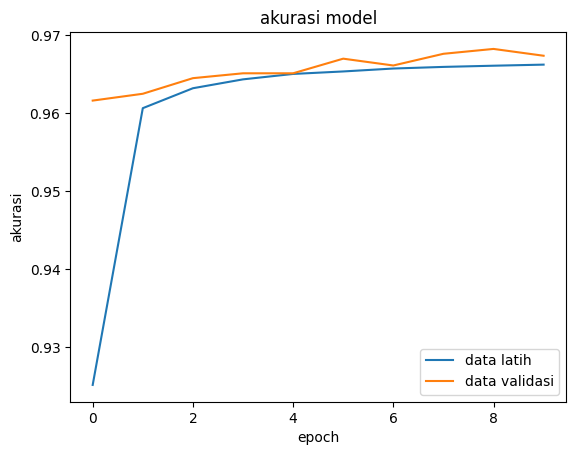

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('akurasi model')
plt.ylabel('akurasi')
plt.xlabel('epoch')

plt.legend(['data latih','data validasi'],loc='lower right')

In [41]:
y_predict=model.predict(X_test_std)

625/625 [==============================] - 1s 807us/step


In [42]:
print(y_predict.shape)
print(y_predict[0])

(20000, 8)
[9.9992186e-01 1.0228047e-02 8.0627194e-09 4.3734502e-10 1.9158593e-10
 6.0804295e-10 2.8736451e-09 3.9336703e-09]


In [43]:
my_list=[0.25,0.56]
index_of_max_value=np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [44]:
y_predict_label=[np.argmax(i) for i in y_predict]

In [45]:
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80,0,1,0,25,6,140
1,0,54,0,0,2,27,6,80
2,1,28,0,0,0,27,5,158
3,0,36,0,0,1,23,5,155
4,1,76,1,1,1,20,4,155
...,...,...,...,...,...,...,...,...
99995,0,80,0,0,2,27,6,90
99996,0,2,0,0,2,17,6,100
99997,1,66,0,0,3,27,5,155
99998,0,24,0,0,0,35,4,100


In [46]:
df1['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [58]:
y_true=y
threshold = 0.5

# Mengonversi nilai-nilai berkelanjutan menjadi biner (0 atau 1)
y_pred_binary = np.where(y_pred > threshold, 1, 0)
cm = confusion_matrix(y_true, y_pred)  # Ganti y_true dan y_pred dengan data yang sesuai

# Buat heatmap untuk visualisasi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Atur label dan judul
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Tampilkan plot
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [100000, 20000]

In [55]:
print(y_pred)
print(y_true)

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]]
0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


In [51]:
model.fit(X_train, y_train, epochs=10)

# Melakukan prediksi
y_pred = model.predict(X_test)


cm = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['diabetes','not_diabetes']); ax.yaxis.set_ticklabels(['diabetes','not_diabetes']);

Epoch 1/10


2500/2500 [==============================] - 2s 967us/step - loss: 0.1386 - accuracy: 0.9499
Epoch 2/10
2500/2500 [==============================] - 2s 913us/step - loss: 0.1378 - accuracy: 0.9510
Epoch 3/10
2500/2500 [==============================] - 2s 957us/step - loss: 0.1358 - accuracy: 0.9521
Epoch 4/10
2500/2500 [==============================] - 2s 834us/step - loss: 0.1395 - accuracy: 0.9508
Epoch 5/10
2500/2500 [==============================] - 2s 955us/step - loss: 0.1362 - accuracy: 0.9520
Epoch 6/10
2500/2500 [==============================] - 2s 913us/step - loss: 0.1382 - accuracy: 0.9510
Epoch 7/10
2500/2500 [==============================] - 2s 891us/step - loss: 0.1372 - accuracy: 0.9510
Epoch 8/10
2500/2500 [==============================] - 2s 987us/step - loss: 0.1366 - accuracy: 0.9508
Epoch 9/10
2500/2500 [==============================] - 2s 989us/step - loss: 0.1383 - accuracy: 0.9504
Epoch 10/10
625/625 [==============================] - 0s 721us/step


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [47]:
target = ["B","S"]
cm = confusion_matrix(y_pred1,test_y1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
 display_labels=target)
fig, ax = plt.subplots(figsize=(5,5))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.savefig('./dataset/grafik/con_matrix.png')
plt.show()

NameError: name 'y_pred1' is not defined

In [ ]:
datamasuk = (0, 44.0, 0, 0, 0, 19.31, 6.5, 200)
input_data = (1, 76.0, 1, 1, 4, 20.14, 4.8, 155)

# Mengubah data input menjadi array NumPy
input_data_as_np = np.asarray(input_data)
input_data_reshaped = input_data_as_np.reshape(1, -1)

# Standarisasi data input
input_data_std = scaler.transform(input_data_reshaped)

# Melakukan prediksi dengan model
predict = model.predict(input_data_std)

# Mendapatkan label prediksi
predict_label = [np.argmax(predict)]

# Menampilkan hasil prediksi
if predict_label == [0]:
    print('Berisiko diabetes')
else:
    print('Tidak diabetes')

1/1 [==============================] - 0s 19ms/step
Berisiko diabetes


c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(y_test,predict)
pd.crosstab(y_test, predict, rownames = ['Actual'], colnames =['Predicted'], margins = True)

ValueError: Found input variables with inconsistent numbers of samples: [20000, 1]